In [1]:
import turicreate as tc

In [3]:
data =  tc.SFrame('../datasets/cell type/feature_celltype.csv')

Finished parsing file /root/notebooks/ML_GEO data/metadata-unsupervised-assessment/datasets/cell type/feature_celltype.csv

Parsing completed. Parsed 100 lines in 0.04101 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,float,int,int,float,int,int,int,float,int,int,float,int,int,int,int,float,int,int,int,float,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /root/notebooks/ML_GEO data/metadata-unsupervised-assessment/datasets/cell type/feature_celltype.csv

Parsing completed. Parsed 1644 lines in 0.030748 secs.

In [4]:
data.head()

key,KEY CLASS,types,primary,targeted,subpopulation,source,(human),[c],sarcoma
# of tissue = 36 tissue,no,0,0.0,0,0,0.0,0,0,0
4 months tissue,no,0,0.0,0,0,0.0,0,0,0
prostate tissue,no,0,0.0,0,0,0.0,0,0,0
# of tissue = 1 tissue,no,0,0.0,0,0,0.0,0,0,0
# of tissue = 40 tissue,no,0,0.0,0,0,0.0,0,0,0
# of tissue = 42 tissue,no,0,0.0,0,0,0.0,0,0,0
fetal vs adult tissue,no,0,0.0,0,0,0.0,0,0,0
# of tissue = 38 tissue,no,0,0.0,0,0,0.0,0,0,0
a.thaliana tissue,no,0,0.0,0,0,0.0,0,0,0
age of ffpe tissue,no,0,0.0,0,0,0.0,0,0,0


In [5]:
type(data)

turicreate.data_structures.sframe.SFrame

In [4]:
train_data, test_data = data.random_split(0.7)

In [5]:
model = tc.logistic_classifier.create(train_data, target = 'KEY CLASS', features = ['types', 'primary', 'targeted',
                                                                           'subpopulation', 'source', '(human)',
                                                                           '[c]', 'sarcoma', 'derived', '(sorted)', 
                                                                           'melanoma', 'cancer', 'test', 
                                                                           'cultured', 'background', 'condition', 
                                                                           'tumor', 'subset', '(immunophenotype)', 
                                                                           'sorted', 'host', 'pancreatic', 'type(s)', 
                                                                           'type/growth', 'cells', 'spleen', 
                                                                           '(facs', 'culture', 'human),', 
                                                                           't-cells', 'embryonic', 'dendritic', 
                                                                           'conventional', 'nodes,', 'adult', 
                                                                           'polarizing', 'dfci', 'normal,', 
                                                                           'conditions', 'fibroblast', 'cd4+', 
                                                                           'stem', 'cd133/2', 'mouse', 'human', 
                                                                           'neuroblastoma', 'lymph', 
                                                                           'progenitor', 'plasmacytoid', 'btic,', 
                                                                           'snib,', 'tumorous,', 'immortalized'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) '(human)', 'subset', 'pancreatic', 'type/growth', 'spleen', 't-cells', 'nodes,', 'adult', 'polarizing', 'conditions', 'cd4+', 'btic,', 'snib,' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 1125

Number of classes           : 2

Number of feature columns   : 53

Number of unpacked features : 53

Number of coefficients      : 54

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.028517     | 0.998222          | 0.980769            |

| 2         | 3        | 1.037162     | 0.998222          | 0.980769            |

| 3         | 4        | 1.052256     | 0.998222          | 0.980769            |

| 4         | 5        | 1.064103     | 0.998222          | 0.980769            |

| 5         | 6        | 1.070658     | 0.998222          | 0.980769            |

| 6         | 7        | 1.083208     | 0.998222          | 0.980769            |

+-----------+----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [6]:
model

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 54
Number of examples             : 1125
Number of classes              : 2
Number of feature columns      : 53
Number of unpacked features    : 53

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 10
Solver status                  : TERMINATED: Iteration limit reached.
Training time (sec)            : 1.1186

Settings
--------
Log-likelihood                 : 4.52

Highest Positive Coefficients
-----------------------------
(intercept)                    : 11.0584
tumor                          : 0.186
source                         : 0.1194
host                           : 0.1003
condition                      : 0.0921

Lowest Negative Coefficients
----------------------------
targeted                       : -19.0468
subp

In [7]:
# Make predictions and evaluate results.
ev_train = model.evaluate(train_data)

In [8]:
ev_train

{'accuracy': 0.9974511469838573,
 'auc': 0.9994814174589457,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  cell type   |    cell type    |   17  |
 |  cell type   |        no       |   3   |
 |      no      |        no       |  1157 |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.998705222270177,
 'log_loss': 0.009835334431523327,
 'precision': 0.9974137931034482,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+------+-----+------+----+
 | threshold | fpr  | tpr |  p   | n  |
 +-----------+------+-----+------+----+
 |    0.0    | 1.0  | 1.0 | 1157 | 20 |
 |   1e-05   | 0.9  | 1.0 | 1157 | 20 |
 |   2e-05   | 0.85 | 1.0 | 1157 | 20 |
 |   3e-05   | 0.8  | 1.0 | 1157 | 20 |
 |

In [9]:
ev_test = model.evaluate(test_data)

In [10]:
ev_test

{'accuracy': 0.974304068522484,
 'auc': 0.7653508771929824,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  cell type   |    cell type    |   1   |
 |  cell type   |        no       |   10  |
 |      no      |        no       |  454  |
 |      no      |    cell type    |   2   |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9869565217391305,
 'log_loss': 0.2160892488730531,
 'precision': 0.978448275862069,
 'recall': 0.9956140350877193,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+----+
 | threshold | fpr | tpr |  p  | n  |
 +-----------+-----+-----+-----+----+
 |    0.0    | 1.0 | 1.0 | 456 | 11 |
 |   1e-05   | 1.0 | 1.0 | 456 | 11 |
 |   2e-05   | 1.0 | 1.0 | 456 | 11 

In [11]:
ev_test.items()

[('f1_score', 0.9869565217391305),
 ('auc', 0.7653508771929824),
 ('recall', 0.9956140350877193),
 ('precision', 0.978448275862069),
 ('log_loss', 0.2160892488730531),
 ('roc_curve', Columns:
  	threshold	float
  	fpr	float
  	tpr	float
  	p	int
  	n	int
  
  Rows: 100001
  
  Data:
  +-----------+-----+-----+-----+----+
  | threshold | fpr | tpr |  p  | n  |
  +-----------+-----+-----+-----+----+
  |    0.0    | 1.0 | 1.0 | 456 | 11 |
  |   1e-05   | 1.0 | 1.0 | 456 | 11 |
  |   2e-05   | 1.0 | 1.0 | 456 | 11 |
  |   3e-05   | 1.0 | 1.0 | 456 | 11 |
  |   4e-05   | 1.0 | 1.0 | 456 | 11 |
  |   5e-05   | 1.0 | 1.0 | 456 | 11 |
  |   6e-05   | 1.0 | 1.0 | 456 | 11 |
  |   7e-05   | 1.0 | 1.0 | 456 | 11 |
  |   8e-05   | 1.0 | 1.0 | 456 | 11 |
  |   9e-05   | 1.0 | 1.0 | 456 | 11 |
  +-----------+-----+-----+-----+----+
  [100001 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.),
 ('confu

In [38]:
model.predict(test_data)

dtype: str
Rows: 506
['no', 'no', 'no', 'treatment', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'treatment', 'no', 'no', 'no', 'no', 'no', 'treatment', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'treatment', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', ... ]

In [39]:
#ev_test.items()
ev_test['auc']

0.7281228842247817

In [14]:
roc_curve_table = ev_test['roc_curve']

In [15]:
roc_curve_table

threshold,fpr,tpr,p,n
0.0,1.0,1.0,478,25
1e-05,0.96,0.995815899582,478,25
2e-05,0.96,0.995815899582,478,25
3e-05,0.96,0.995815899582,478,25
4e-05,0.96,0.995815899582,478,25
5e-05,0.96,0.995815899582,478,25
6e-05,0.96,0.995815899582,478,25
7e-05,0.92,0.995815899582,478,25
8e-05,0.92,0.995815899582,478,25
9e-05,0.92,0.995815899582,478,25


In [16]:
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


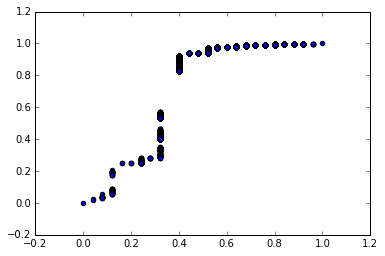

In [17]:
plt.scatter(roc_curve_table['fpr'], roc_curve_table['tpr'])

In [18]:
#predictions.export_csv('test_pred_all_log_reg.csv')

In [19]:
ev_train['auc']

0.9567592592592596

In [20]:
roc_curve_train = ev_train['roc_curve']

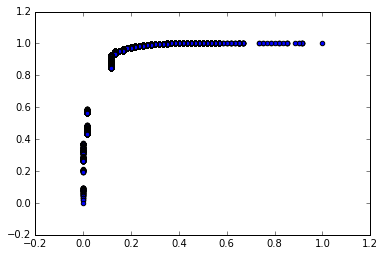

In [21]:
plt.scatter(roc_curve_train['fpr'],roc_curve_train['tpr'])

In [12]:
test_data.export_csv('test_data_celltype.csv')

In [13]:
predictions = model.classify(test_data)

In [14]:
predictions.export_csv('predictions_celltype.csv')

In [32]:
train_data.export_csv('train_balance.csv')

In [33]:
pred_train = model.classify(train_data)

In [34]:
pred_train.export_csv('train_pred_bal.csv')

In [ ]:
model = tc.classifier.create(train_data, target = 'Key Class', features = ['years', 'diagnosis',
                                                                          'ffpe', '26', 'weeks'])